# Flippin' Shapes

What's the next bit of complexity we can add to rotating triangles, squares, and other polygons? Well, if they're in our 3D world, they all can be flipped over.

What sort of graph does this group produce? Well, if we use a dot like we did before, the dot can be in one of the $n$ corners of the $n$-gon, but it also could be on either the front side or back side of the shape. In order to visualize things better, we'll define the 'flip' to be flipped over the axis going through both the dot and the center of the shape. (If you're interested, try to convince yourself this is the same as being flipped over some other axis that doesn't depend on the position of the dot.)

As before, let's use the idea of a Cayley graph. Instead of visualizing the shape moving around from pose to pose, visualize each place the dot could be all at once. Then, think through each move we could do on the shape. If there's a move that we could do to turn one dot into another, then connect those dots in the graph. [TODO: make some images for this process]

What we end up with is a prism graph with $n$ sides. It looks something like this:

![image of example prism graphs](http://mathworld.wolfram.com/images/eps-gif/PrismGraph_1000.gif)

Credit: Wolfram MathWorld
[TODO] make better images for this.

As before, with the polygon example, we're looking for the expected length of a random walk from a randomly chosen vertex to a given target vertex. We can use the same method as last time: convert the graph to an adjacency matrix, and then solve the matrix to find the expected time for each node, then average all the nodes. However, it's more elegant to have a closed-form solution, and it tells us more about what's going on in the graph - so just like before, we'll write some code to calculate the answer for us if it's given some $n$, then work through the patterns we find, and try to justify them.

## Calculating with some Linear Algebra

As before, we have a linear equation for each vertex in the graph. Let's consider $n=5$. Each vertex has a one-third chance of going to the two vertices next to it in the cycle, and a one third chance of going to the other cycle. Laying out the vertices in 0 to 4 of one cycle, and 0 to 4 of the other, we get the matrix

\begin{bmatrix}
 1 & -\frac{1}{3} & 0 & 0 & -\frac{1}{3} & -\frac{1}{3} & 0 & 0 & 0 & 0 \\
 -\frac{1}{3} & 1 & -\frac{1}{3} & 0 & 0 & 0 & -\frac{1}{3} & 0 & 0 & 0 \\
 0 & -\frac{1}{3} & 1 & -\frac{1}{3} & 0 & 0 & 0 & -\frac{1}{3} & 0 & 0 \\
 0 & 0 & -\frac{1}{3} & 1 & -\frac{1}{3} & 0 & 0 & 0 & -\frac{1}{3} & 0 \\
 -\frac{1}{3} & 0 & 0 & -\frac{1}{3} & 1 & 0 & 0 & 0 & 0 & -\frac{1}{3} \\
 -\frac{1}{3} & 0 & 0 & 0 & 0 & 1 & -\frac{1}{3} & 0 & 0 & -\frac{1}{3} \\
 0 & -\frac{1}{3} & 0 & 0 & 0 & -\frac{1}{3} & 1 & -\frac{1}{3} & 0 & 0 \\
 0 & 0 & -\frac{1}{3} & 0 & 0 & 0 & -\frac{1}{3} & 1 & -\frac{1}{3} & 0 \\
 0 & 0 & 0 & -\frac{1}{3} & 0 & 0 & 0 & -\frac{1}{3} & 1 & -\frac{1}{3} \\
 0 & 0 & 0 & 0 & -\frac{1}{3} & -\frac{1}{3} & 0 & 0 & -\frac{1}{3} & 1 \\
\end{bmatrix}


Note that the matrix is split into four squares, with the top left and bottom right being the same, and the top right and bottom left being the same. Why is this the case?

If we remove the topmost row and leftmost column, as we did before, we get our matrix. 

I've programmed a function to generate this matrix in SageMath code [much like Python, but mathy-er].

In [1]:
# n = number of sides of shape
# returns: A, b such that Ax = b is the expected number of moves.
def create_prism_graph_matrix(n):
    
    # this is a handy value to not keep writing.
    # it's for when one vertex is linked with another.
    link = -1/3
    
    # make the matrices from QQ (the rational numbers)
    A = matrix(QQ, 2*n, 2*n)
    b = matrix(QQ, 2*n, 1)
    
    # first, fill out the top left
    for i in range(n):
        A[i, i] = 1
        b[i, 0] = 1
        if i > 0:
            A[i-1, i] = link
            A[i, i-1] = link
    
    # now, do the bottom right
    for i in range(n, 2*n):
        A[i, i] = 1
        b[i, 0] = 1
        if i > n:
            A[i-1, i] = link
            A[i, i-1] = link
    
    # fill out the diagonals 
    for i in range(n):
        A[i, i+n] = link
        A[i+n, i] = link
    
    # get those last pesky corners.
    A[0, n-1] = link
    A[n-1, 0] = link
    A[n, 2*n-1] = link
    A[2*n-1, n] = link
    
    # trim off the top row and left column.
    A = A[1:, 1:]
    b = b[1:]
    
    return A, b

In [2]:
from IPython.display import display, Markdown, Latex

# Let's work with a pentagon that we can flip
n = 5

# Make the matrix and make sure it looks right.
A, b = create_prism_graph_matrix(n)
display(Markdown(latex(A)[6:-7]))

\begin{array}{rrrrrrrrr}
1 & -\frac{1}{3} & 0 & 0 & 0 & -\frac{1}{3} & 0 & 0 & 0 \\
-\frac{1}{3} & 1 & -\frac{1}{3} & 0 & 0 & 0 & -\frac{1}{3} & 0 & 0 \\
0 & -\frac{1}{3} & 1 & -\frac{1}{3} & 0 & 0 & 0 & -\frac{1}{3} & 0 \\
0 & 0 & -\frac{1}{3} & 1 & 0 & 0 & 0 & 0 & -\frac{1}{3} \\
0 & 0 & 0 & 0 & 1 & -\frac{1}{3} & 0 & 0 & -\frac{1}{3} \\
-\frac{1}{3} & 0 & 0 & 0 & -\frac{1}{3} & 1 & -\frac{1}{3} & 0 & 0 \\
0 & -\frac{1}{3} & 0 & 0 & 0 & -\frac{1}{3} & 1 & -\frac{1}{3} & 0 \\
0 & 0 & -\frac{1}{3} & 0 & 0 & 0 & -\frac{1}{3} & 1 & -\frac{1}{3} \\
0 & 0 & 0 & -\frac{1}{3} & -\frac{1}{3} & 0 & 0 & -\frac{1}{3} & 1
\end{array}

In [13]:
def get_expected_moves(n):
    A, b = create_prism_graph_matrix(n)
    
    # solve the matrix & make sure it's a real solution
    x = A.augment(b).echelon_form()[:, -1]
    assert(not any(A*x - b))

    # finally, average among all the entries in the vector.
    prediction = sum(x)[0] / (n*2)
    return prediction


In [14]:
prediction = get_expected_moves(5)
print "The prediction is {} which is about {:.3f}".format(prediction, float(prediction))

The prediction is 393/38 which is about 10.342


## A Chance to Check Your Work

Neat! This is a small example. Can we verify it?

Let's write a program that simulates this process a lot, and see if we find the same answer.

The process is very similar to our triangle example. However, in this case, we'll think of the state as two terms. The first is where the dot is along the polygon, which as before we'll number from $0$ to $n-1$. The second is whether the dot is facing up or down, which we'll give the values `'u'` or `'d'` to. Then, each state is a pairing of some number with either up or down.

In [6]:
import itertools
all_states = [i for i in itertools.product(
    [0, 1, 2, 3, 4],
    ['u', 'd']
)]
print all_states

[(0, 'u'), (0, 'd'), (1, 'u'), (1, 'd'), (2, 'u'), (2, 'd'), (3, 'u'), (3, 'd'), (4, 'u'), (4, 'd')]


In [7]:
# What moves can we do?

# We can rotate clockwise, which we'll say is adding one
def rotate_cw(state):
    n, side = state
    return ((n+1) % 5, side)

# We can rotate counterclockwise, which is subtracting one
def rotate_ccw(state):
    n, side = state
    return ((n-1) % 5, side)

# or we can flip
def flip(state):
    n, side = state
    if side == 'u':
        new_side = 'd'
    elif side == 'd':
        new_side = 'u'
    else:
        # when your code is broken, you want to know why.
        raise ValueError('Side was neither u nor d.')
    return (n, new_side)

moves = [rotate_cw, rotate_ccw, flip]

# Let's check them to make sure they work.
assert( (3,'u') == rotate_cw( (2,'u') ))
assert( (4,'d') == rotate_ccw( (0,'d') ))
assert( (1,'u') == flip( (1,'d') ))

print 'All good!'

All good!


In [12]:
from random import choice # choice selects a random item from a given list.

moves_in_each_trial = []
# For a lot of trials:
for _ in range(10000):
    number_of_moves = 0
    
    # start at a random state
    state = choice(all_states)
    
    # check if it's not the goal state
    while state != (0, 'u'):
        number_of_moves += 1
        
        # randomly select a move, and apply it.
        random_move = choice(moves)
        state = random_move(state)
    
    moves_in_each_trial.append(number_of_moves)
    
average = sum(moves_in_each_trial) / len(moves_in_each_trial)

fmt_string = 'The predicted value is about {:.3f}, ' \
    'and the experimental value is {:.3f}'

print fmt_string.format(float(prediction), float(average))

The predicted value is about 10.342, and the experimental value is 10.354


With luck, we aren't too off. 

## Plotting Some Revenge

Now, let's look at some other values, not just 5.

In [31]:
move_counts = [(i, get_expected_moves(i)) for i in range(3, 20)]
for i, m in move_counts:
    print 'A polygon with {} sides takes on average {} moves'.format(i, m)

A polygon with 3 sides takes on average 47/10 moves
A polygon with 4 sides takes on average 29/4 moves
A polygon with 5 sides takes on average 393/38 moves
A polygon with 6 sides takes on average 279/20 moves
A polygon with 7 sides takes on average 2565/142 moves
A polygon with 8 sides takes on average 635/28 moves
A polygon with 9 sides takes on average 14731/530 moves
A polygon with 10 sides takes on average 27931/836 moves
A polygon with 11 sides takes on average 78183/1978 moves
A polygon with 12 sides takes on average 11997/260 moves
A polygon with 13 sides takes on average 393153/7382 moves
A polygon with 14 sides takes on average 708821/11644 moves
A polygon with 15 sides takes on average 380137/5510 moves
A polygon with 16 sides takes on average 210779/2716 moves
A polygon with 17 sides takes on average 8916627/102818 moves
A polygon with 18 sides takes on average 1736019/18020 moves
A polygon with 19 sides takes on average 40848927/383722 moves


Can you see a pattern? I don't. What if we tried plotting it?

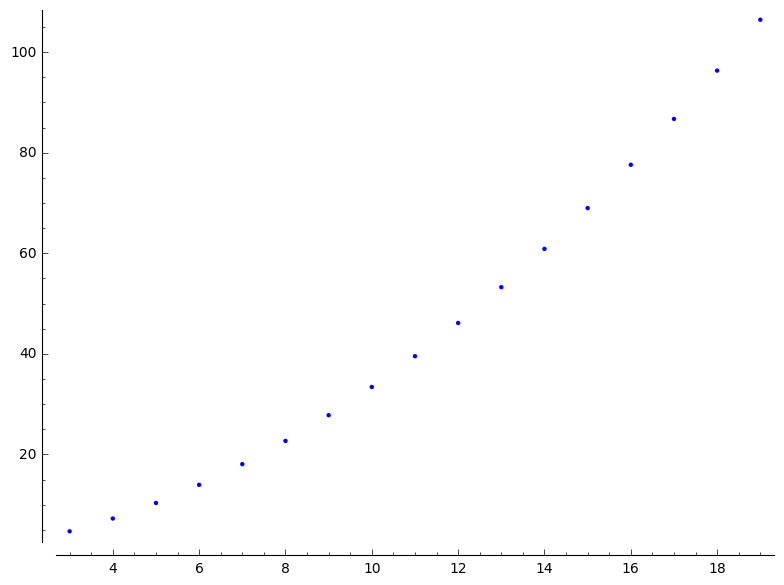

In [32]:
list_plot(move_counts)

Well that looks pretty well-behaved. Maybe it's a polynomial of some sort? What if we tried to fit a polynomial curve to it?

polynomial coefficients are [ 0.25002262  0.86434629 -0.22307807]


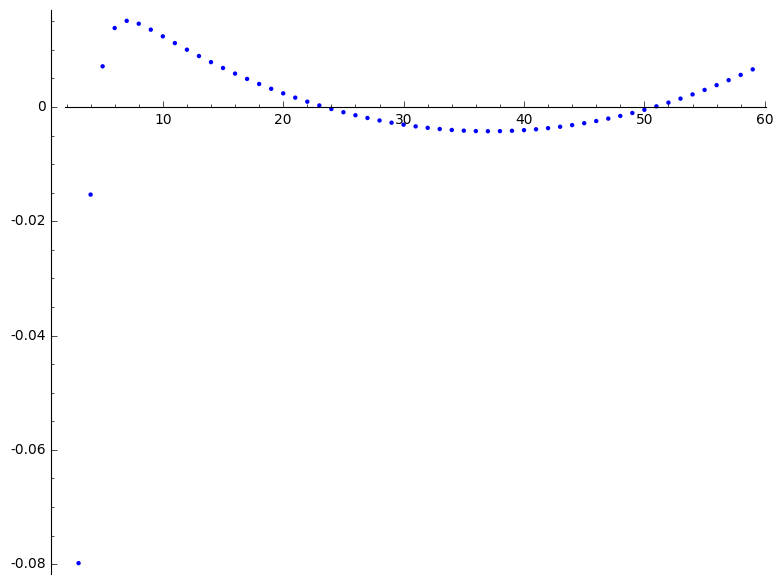

In [33]:
import numpy as np

# make move counts a lot bigger
move_counts = [(i, get_expected_moves(i)) for i in range(3, 60)]

def plot_error(move_counts):
    xs, ys = zip(*move_counts)
    p = np.polyfit(xs, ys, 2)
    print 'polynomial coefficients are', p
    errors = zip(xs, np.polyval(p, xs) - ys)
    return list_plot(errors)

show(plot_error(move_counts))

Huh. Well, that's interesting. We're off by a lot right at the beginning but it gets a lot better over time. What if we try to fit just the later terms?

polynomial coefficients are [ 0.25       0.8660254 -0.25     ]


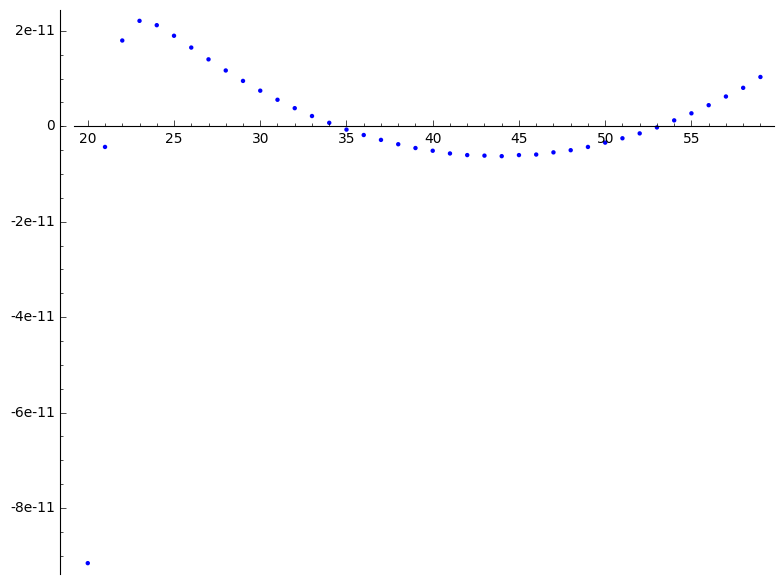

In [34]:
show(plot_error(move_counts[-40:]))

We get a similar pattern for the later terms too, but the error is much, much less. Maybe that means there's an exponential function term?

To see the other things I tried while fitting a function to the data, see the i_tried_some_plotting notebook [todo add link]

Also, look at the values we got in the function fit. Two of them are really nice! There's probably something going on behind the scenes that actually uses those coeffecient polynomials. I wonder what the third term is... it's not a number I recognize, and it doesn't seem to be a rational number... is it a square root?

In [35]:
0.8660254^2

0.749999993445160

Wow! That's obnoxiously close to $\frac{3}{4}$. That means our polynomial is something super close to

$$ \frac{1}{4} x^2 + \frac{\sqrt{3}}{2} x -\frac{1}{4} $$

or written another way,

$$ \frac{x^2 + 2\sqrt{3}x - 1}{4} $$

## Opening the Closed Form

This part was tantalyzingly close to a result. In fact, it's exponentially close. 

But I had no idea how to continue - only my different function fits and a little bit of intuition. So I asked for help through [this math stackexchage question](https://math.stackexchange.com/questions/2833028/random-walk-on-a-prism-graph-of-n-sides-plus-some-curve-fitting), and the answer came with credit to 'joriki'. I include the results below, with minor editing.

### The $\frac{n^2 - 1}{4}$ comes from the cycle...
A prism graph $Y_n$ of $n$ sides is the Cartesian product of a cycle graph $C_n$ with a path graph $P_2$. Let's label the vertices of $P_2$ by $\uparrow$ and $\downarrow$ and the vertices of $C_n$ by $0$ to $n−1$, and assume (without loss of generality) that your target vertex is $(0,\uparrow)$.

We can divide every sequence of steps into groups consisting of one step along $C_n$ preceded by any number of up or down steps along $P_2$. The random walk on G thus induces a random walk on $C_n$.

Denote the expected number of steps on $Y_n$ per step on $C_n$ by $x$. To take a step on $Y_n$ we need $1$ step on $C_n$ with probability $\frac{2}{3}$ and $1+x$ steps on $C_n$ with probability $\frac{1}{3}$, so $x = \frac{2}{3} + \frac{1}{3}(1+x)$, so $x=\frac{3}{2}$. So on average each step on $C_n$ takes $\frac{3}{2}$ steps on $Y_n$.

To get to your target, you first of all need to get to $0$ on $C_n$, ignoring for now where you are on $P_2$. It's a well-known result that the expected number of steps to reach vertex $0$ in a random walk on $C_n$ starting from $k$ is $k(n−k)$. Your initial $k$ is uniformly distributed, so this yields an expected

$$\frac{1}{n} \sum_{k=0}^{n-1} k(n-1) = \frac{n^2-1}{6}$$

steps on $C_n$. By linearity of expectation, we can scale this up by the factor $\frac{3}{2}$ to get the expected number of steps on $Y_n$, $\frac{n^2 - 1}{4}$. That explains one half of your result.

### ... and the $\frac{\sqrt{3}}{2}$ comes from the path.

Now we're at $0$ on $C_n$. We started out with a uniform distribution on $P_2$, which is invariant under the random walk, so we still have a uniform distribution on $P_2$. Thus, with probability $\frac{1}{2}$ we're done, and with probability $\frac{1}{2}$ we still have to get from $(0,\downarrow)$ to $(0,\uparrow)$.

Let $L$ denote the expected length of the walk from $(0,\downarrow)$ to $(0,\uparrow)$, and think of this walk as a sequence of attempts, each of which succeeds if it reaches $(0,\uparrow)$ and fails if it returns to $(0,\downarrow)$. With probability $\frac{1}{3}$, we immediately succeed. With probability $\frac{2}{3}$, we go to one of the other two neigbours of $(0,\downarrow)$. Then we have to take another random walk on $C_n$ until we get back to $0$. That takes us $n−1$ steps on $C_n$, and thus $\frac{3}{2}(n−1)$ steps on $Y_n$. Adding the 1 step we take in either case yields a total of $1+\frac{2}{3}\cdot \frac{3}{2}(n−1) = n$ expected steps so far.

Now we need the probability for returning to $(0,\downarrow)$ instead of reaching $(0,\uparrow)$. With every step we take on $C_n$, we have a probability $\frac{1}{4}$ of switching sides on $P_2$ beforehand. Thus our initial probability of being on $\downarrow$ decays towards $\frac{1}{2}$ as $\frac{1}{2}+\frac{1}{2}(\frac{1}{2})^j$ when we take $j$ steps on $C_n$.

Here comes the part where we disregard terms that decay exponentially with nn. We'll sum the decaying part of this probability as if CnCn were infinite and we couldn't wrap around to the origin. That introduces an error of order 2−n2−n, since the probability has decayed by at least that much before we wrap around.

Now we just have to count the paths that lead from 11 to 00 and sum over the corresponding powers of 12⋅12=1412⋅12=14 (where one factor comes from the probability of going right or left and the other factor comes from the exponential decay in the probability.) The number of paths starting at 11 that hit 00 for the first time after 2j+12j+1 steps is CjCj, the jj-th Catalan number. (The notational confusion due to the fact that both the cycle graphs and the Catalan numbers are conventionally denoted by CC shouldn't be too great, as they appear in quite different contexts.) Thus the probability to return to (0,↓)(0,↓) is

12+12∑j=0∞4−(2j+1)Cj.
12+12∑j=0∞4−(2j+1)Cj.
The series is 1414 times the generating function of the Catalan numbers, evaluated at 116116. The generating function of the Catalan numbers can be shown to be

∑n=0∞Cnxn=1−1−4x‾‾‾‾‾‾√2x.
∑n=0∞Cnxn=1−1−4x2x.
Thus, with probability

12+18⋅1−1−4⋅116‾‾‾‾‾‾‾‾‾√2⋅116=3−3‾√2
12+18⋅1−1−4⋅1162⋅116=3−32
we return to (0,↓)(0,↓) and have to try again, taking another expected LL steps. That yields a linear equation for LL,

L=n+23⋅3−3‾√2⋅L=n+(1−13‾√)L,
L=n+23⋅3−32⋅L=n+(1−13)L,
with solution L=3‾√nL=3n. Since the probability of getting to (0,↓)(0,↓) in the first place was 1212, this yields the additional term 3√2n32n in your result.



I followed up with some questions, and this comment was particularly enlightening:

> To answer your question more precisely: The error is related to wrapping around and still having a trace of the bias of starting at $\downarrow$ left. It's not that unlikely to wrap around, but by the time you do, the term that describes the deviation of the distribution on $P_2$ from the uniform distribution has decayed exponentially. The possibility of wrapping around itself is taken care of exactly in the expected $n−1$ steps to get from $1$ to $0$, which include paths that wrap around; what's disregarded is that these would still have a tiny bias towards $\downarrow$.

In short, if it was possible to find a more accurate value for the length of the expected walk from $(1, \downarrow)$ to $(0, \uparrow)$, then we'd have a better solution. Where do the Catalan numbers go wrong? Or more to the point, what do they have to do with this problem at all?

## Cycling Back Around

I was confused why the Catalan numbers were involved in joriki's answer. What were they, and what did they have to do with this problem?

As joriki said,
> The number of paths starting at $1$ that hit $0$ for the first time after $2j+1$ steps is $C_j$, the $j$-th Catalan number.

Here, I propose a good way to visualize it. Consider a table of numbers, where each row represents a vertex and each column represents a moment in time. The number of paths that one can take to reach a particular vertex after a certain number of moves is the sum of the difference sources that lead to a particular point.

\begin{array}{c|ccccc}
0 &  & 1 &  & 1 &  & 2 &  & 5 &  & 14 \\
\hline 
1 & 1 &  & 1 &  & 2 &  & 5 &  & 14 & & \dots \\
2 &  & 1 &  & 2 &  & 5 &  & 14 &  & 42  \\
3 &  &  & 1 &  & 3 &  & 9 &  & 28 &  & \dots \\
4 &  &  &  & 1 &  & 4 &  & 14 &  & 47  \\
5 &  &  &  &  & 1 &  & 5 &  & 20 &  & \dots \\
6 &  &  &  &  &  & 1 &  & 6 &  & 27  \\
7 &  &  &  &  &  &  & 1 &  & 7 &  & \dots\\
\vdots & & & & & & & & \ddots & & \ddots
\end{array}

For example, the 9 in the 3rd row comes from the fact there are 4 paths to the fourth row at that time, and each of them could move back up one and be unique, and there are 5 paths to the second row at that time, and each of them could move down and be unique.

Note that the top row -- $1, 1, 2, 5, 14, 42... $ -- is the Catalan numbers.

But the difference is that we don't know how many walks exit at each moment if it's a cycle, not an infinite path. As is always a good idea, start with a few small examples. In order to draw this, we just need to add in a bottom row with 0 as well. Let's start with $n=3$, a triangle.

\begin{array}{c|ccccc}
0 &  & 1 &  & 1 &  & 1  \\
\hline 
1 & 1 &  & 1 &  & 1 &  & 1  \dots \\
2 &  & 1 &  & 1 &  & 1   \\
\hline
0 &  &  & 1 &  & 1 &  & 1 \dots \\
\end{array}

That's not very exciting. How about larger values? What does $n=7$ look like?

\begin{array}{c|cccccccccccccc}
0 &  & 1 &  & 1 &  & 2 &  & 5 &  & 14 &  & 42 &  & 131 \\
\hline 
1 & 1 &  & 1 &  & 2 &  & 5 &  & 14 &  & 42 &  & 131 & \\
2 &  & 1 &  & 2 &  & 5 &  & 14 &  & 42 &  & 131 &  & 417 \\
3 &  &  & 1 &  & 3 &  & 9 &  & 28 &  & 89 &  & 286 & \\
4 &  &  &  & 1 &  & 4 &  & 14 &  & 47 &  & 155 &  & 507 \\
5 &  &  &  &  & 1 &  & 5 &  & 19 &  & 66 &  & 221 & \\
6 &  &  &  &  &  & 1 &  & 5 &  & 19 &  & 66 &  & 221 \\
\hline 
0 &  &  &  &  &  &  & 1 &  & 5 &  & 19 &  & 66 & \\
\end{array}

Is there some pattern to these things? Well, there doesn't seem to be any obvious one. Nevertheless, I popped it into OEIS and found [A096976 - Number of walks of length $x$ on $P_3$ plus a loop at the end](http://oeis.org/A096976). It had a nice linear recurrence: $a(x) = a(x-1) + 2a(x-2) - a(x-3)$. Did the other ones have a good recurrence, too? So far, they did.

\begin{array} &
 n=3, & a(x) = a(x-1) \\
 n=4, & a(x) = 2a(x-2) \\
 n=5, & a(x) = a(x-1) + a(x-2) \\
 n=6, & a(x) = 3a(x-2) \\
 n=7, & a(x) = a(x-1) + 2a(x-2) - a(x-3) \\
\end{array}

Was there a pattern in the recurrences? I hadn't seen one yet, but that didn't stop me from wanting to calculate more and dumping the sequence into OEIS.

## Calculating Recurrences

some code that calculated the recurrences for me.
then an output table

oh look, even vs. odd is different.

i found this trianlge but it's weird and i don't understand it or how to produce it.

But right around this time in my thought process, the idea generating functions took root.

## Detour into Generating Functions

A generating function is...

It's cool because usually if you're doing something with an infinite number of terms you're doing something that gets exponentially less likely. which is totally what I'm doing in this case - there's the elss probability each time.

what were the generating functions of those sequences?

well n = 3 is 1/(1-x)
and n = 5 is...

but now is tehre some way to manage the polynomials... well it appears so! remember that triangle - it matches the generating polynomails spot-on!

ok, well now let's return to the question at hand

## So Close And Yet So Far: $\mathbb{E}(L_{(1,\downarrow)})$

So what we have here is the number of moves $\mathbb{E}(L_{(1,\downarrow)})$. How do we begin to think about it and break it apart?

Well, following joriki's lead, let's think about it as a combination of the number
of moves on a complete graph $C_n$ and the number of moves on that
small path $P_2$. It feels like all we want to know - i.e, the probability of a certain path occuring, how many moves were
taken, and how often that walk ends up at $(0, \downarrow)$ as opposed to $(0, \uparrow)$ - can be expressed in terms of a certain number of moves on each graph.

The relation is as follows:

$$ \mathbb{E}(L_{(1,\downarrow)}) = \sum_{\ell_{C}=1}^{\infty} \sum_{f=0}^{\infty} P(\ell_{C},f) (\ell_{C}+f+\frac{1+(-1)^{f}}{2}\mathbb{E}(L_{(0,\downarrow)})) $$


The number of moves is the sum of bunch of cases, each weighted by their probability. The values $\ell_{C}$ and $f$ can be infinite, but they are weighted by some probability function $P(\ell_{C},f)$. Then, for each case of $\ell_C$ and $f$, you count the number of moves. In turn, the number of moves is the sum of moves on the cycle ($\ell_{C}$), flips between the cycles ($f$), and whether we end up at $(0, \downarrow)$ again (which is 1 for $f$ even, 0 for $f$ odd) times the number of moves we expect to make from $(0, \downarrow)$.



Now $\mathbb{E}(L_{(0,\downarrow)})$ is a much simpler function of $\mathbb{E}(L_{(1,\downarrow)})$. In the case we're at $(0,\downarrow)$, we certainly must take one step. We also have a one-third chance we walk immediately to $(0,\uparrow)$, a one-third chance we walk to $(1,\downarrow)$, and another third we walk to $(n-1,\downarrow)$. Because of the graph's symmetry, $\mathbb{E}(L_{(1,\downarrow)}) = \mathbb{E}(L_{(n-1,\downarrow)})$, and so we can write $\mathbb{E}(L_{(0,\downarrow)})$ in terms of $\mathbb{E}(L_{(1,\downarrow)})$ as follows:

$$\mathbb{E}(L_{(0,\downarrow)}) = 1 + \frac{2}{3} \mathbb{E}(L_{(1,\downarrow)})$$

### Summing over $f$

Let's now start to break this up. Can we focus on the sum with $f$
first? Let's try to understand the probability $P(\ell_{C},f)$ breaks
down, first converting it to $P(\ell_{C})\cdot P(f|\ell_{C})$. We
have some function for $P(\ell_{C})$, namely, the series in question
$S_{n}$ times some exponent of $\frac{1}{2}$. But what is $P(f|\ell_{C})$?

{[}digression about N successes given M chances to fail{]}. In short,
$P(f|\ell_{C})={f+\ell_{C}-1 \choose \ell_{C}-1}(\frac{1}{3})^{f}(\frac{2}{3})^{\ell_{C}}$.

We now have
\begin{alignat*}{1}
M_{1}= & \sum_{\ell_{C}=1}^{\infty}\sum_{f=0}^{\infty}P(\ell_{C},f)(\ell_{C}+f+\frac{1+(-1)^{f}}{2}M_{0})\\
= & \sum_{\ell_{C}=1}^{\infty}\sum_{f=0}^{\infty}P(\ell_{C})P(f|\ell_{C})(\ell_{C}+f+\frac{1+(-1)^{f}}{2}M_{0})\\
= & \sum_{\ell_{C}=1}^{\infty}P(\ell_{C})\sum_{f=0}^{\infty}P(f|\ell_{C})(\ell_{C}+f+\frac{1+(-1)^{f}}{2}M_{0})\\
= & \sum_{\ell_{C}=1}^{\infty}S_{\ell_{C}}(\frac{1}{2})^{\ell_{C}}\sum_{f=0}^{\infty}{f+\ell_{C}-1 \choose \ell_{C}-1}(\frac{1}{3})^{f}(\frac{2}{3})^{\ell_{C}}(\ell_{C}+f+\frac{1+(-1)^{f}}{2}M_{0})\\
F(\ell_{C})= & \sum_{f=0}^{\infty}{f+\ell_{C}-1 \choose \ell_{C}-1}(\frac{1}{3})^{f}(\frac{2}{3})^{\ell_{C}}(\ell_{C}+f+\frac{1+(-1)^{f}}{2}M_{0})\\
= & \sum_{f=0}^{\infty}{f+\ell_{C}-1 \choose \ell_{C}-1}(\ell_{C})(\frac{1}{3})^{f}(\frac{2}{3})^{\ell_{C}}\\
 & +\sum_{f=0}^{\infty}{f+\ell_{C}-1 \choose \ell_{C}-1}(f)(\frac{1}{3})^{f}(\frac{2}{3})^{\ell_{C}}\\
 & +M_{0}\sum_{f=0}^{\infty}{f+\ell_{C}-1 \choose \ell_{C}-1}\frac{1+(-1)^{f}}{2}(\frac{1}{3})^{f}(\frac{2}{3})^{\ell_{C}}\\
= & F_{1}(\ell_{C})+F_{2}(\ell_{C})+F_{3}(\ell_{C})\\
F_{1}(\ell_{C})= & (\ell_{C})\sum_{f=0}^{\infty}{f+\ell_{C}-1 \choose \ell_{C}-1}(\frac{1}{3})^{f}(\frac{2}{3})^{\ell_{C}}\\
= & \ell_{C}
\end{alignat*}

In [136]:
var("u v x r n")

equations = [
    u^2+v^2==1,
    u*v==x
]
solutions = solve(equations, u, v)
u_eqn, v_eqn = solutions[1] # it's the one where both are positive

G_p = ((u^r+v^r) / (u+v)).subs(u_eqn, v_eqn)

print G_p

G_S = x * G_p.subs(r=n-2) / G_p.subs(r=n)

((sqrt(2)*x/sqrt(sqrt(2*x + 1)*sqrt(-2*x + 1) + 1))^r + sqrt(1/2*sqrt(-4*x^2 + 1) + 1/2)^r)/(sqrt(2)*x/sqrt(sqrt(2*x + 1)*sqrt(-2*x + 1) + 1) + sqrt(1/2*sqrt(-4*x^2 + 1) + 1/2))


$$M_{1}=	M_{a}+M_{b}+M_{c}
=	\frac{3}{2}(\frac{1}{2})G_{S}^{\prime}(\frac{1}{2})+\frac{1}{2}M_{0}\Big(G_{S}(\frac{1}{4})-S_{0}\Big)+\frac{1}{2}M_{0}\Big(G_{S}(\frac{1}{2})-S_{0}\Big)$$
 

In [139]:
var('M_0 M_1')

G_canon = G_S(n=9).canonicalize_radical()

eq1 = M_1 == (3/2)*(1/2)*derivative(G_canon).subs(x=1/2) \
    + (1/2)*M_0*(G_canon(x=1/4)) \
    + (1/2)*M_0*(G_canon(x=1/2))
    
solve([eq1, M_0 == 1 + (2/3)*M_1], M_0, M_1)

[[M_0 == (4131/265), M_1 == (5799/265)]]

In [147]:
from IPython.display import display, Markdown, Latex

display(Markdown('$$' + latex(G_canon) + '$$'))

$$ \frac{x^{4} - 2 \, x^{3} - x^{2} + x}{x^{4} + 2 \, x^{3} - 3 \, x^{2} - x + 1} $$

# IGNORE EVERYTHING THIS IS JUST FOR REFERENCE

Let's now start to break this up. Can we focus on the sum with $f$
first? Let's try to understand the probability $P(\ell_{C},f)$ breaks
down, first converting it to $P(\ell_{C})\cdot P(f|\ell_{C})$. We
have some function for $P(\ell_{C})$, namely, the series in question
$S_{n}$ times some exponent of $\frac{1}{2}$. But what is $P(f|\ell_{C})$?

{[}digression about N successes given M chances to fail{]}. In short,
$P(f|\ell_{C})={f+\ell_{C}-1 \choose \ell_{C}-1}(\frac{1}{3})^{f}(\frac{2}{3})^{\ell_{C}}$.

We now have
\begin{alignat*}{1}
M_{1}= & \sum_{\ell_{C}=1}^{\infty}\sum_{f=0}^{\infty}P(\ell_{C},f)(\ell_{C}+f+\frac{1+(-1)^{f}}{2}M_{0})\\
= & \sum_{\ell_{C}=1}^{\infty}\sum_{f=0}^{\infty}P(\ell_{C})P(f|\ell_{C})(\ell_{C}+f+\frac{1+(-1)^{f}}{2}M_{0})\\
= & \sum_{\ell_{C}=1}^{\infty}P(\ell_{C})\sum_{f=0}^{\infty}P(f|\ell_{C})(\ell_{C}+f+\frac{1+(-1)^{f}}{2}M_{0})\\
= & \sum_{\ell_{C}=1}^{\infty}S_{\ell_{C}}(\frac{1}{2})^{\ell_{C}}\sum_{f=0}^{\infty}{f+\ell_{C}-1 \choose \ell_{C}-1}(\frac{1}{3})^{f}(\frac{2}{3})^{\ell_{C}}(\ell_{C}+f+\frac{1+(-1)^{f}}{2}M_{0})\\
F(\ell_{C})= & \sum_{f=0}^{\infty}{f+\ell_{C}-1 \choose \ell_{C}-1}(\frac{1}{3})^{f}(\frac{2}{3})^{\ell_{C}}(\ell_{C}+f+\frac{1+(-1)^{f}}{2}M_{0})\\
= & \sum_{f=0}^{\infty}{f+\ell_{C}-1 \choose \ell_{C}-1}(\ell_{C})(\frac{1}{3})^{f}(\frac{2}{3})^{\ell_{C}}\\
 & +\sum_{f=0}^{\infty}{f+\ell_{C}-1 \choose \ell_{C}-1}(f)(\frac{1}{3})^{f}(\frac{2}{3})^{\ell_{C}}\\
 & +M_{0}\sum_{f=0}^{\infty}{f+\ell_{C}-1 \choose \ell_{C}-1}\frac{1+(-1)^{f}}{2}(\frac{1}{3})^{f}(\frac{2}{3})^{\ell_{C}}\\
= & F_{1}(\ell_{C})+F_{2}(\ell_{C})+F_{3}(\ell_{C})\\
F_{1}(\ell_{C})= & (\ell_{C})\sum_{f=0}^{\infty}{f+\ell_{C}-1 \choose \ell_{C}-1}(\frac{1}{3})^{f}(\frac{2}{3})^{\ell_{C}}\\
= & \ell_{C}
\end{alignat*}

Noting that the big factor there is only 1 because it's a probability
distribution. {[}todo: change the placement of it{]}. However, $F_{2}$
is a little more intersting.

\begin{alignat*}{1}
F_{2}(\ell_{C})= & \sum_{f=0}^{\infty}{f+\ell_{C}-1 \choose \ell_{C}-1}(f)(\frac{1}{3})^{f}(\frac{2}{3})^{\ell_{C}}\\
= & (\frac{2}{3})^{\ell_{C}}\sum_{f=0}^{\infty}{f+\ell_{C}-1 \choose \ell_{C}-1}(f)(\frac{1}{3})^{f}
\end{alignat*}


Noting that: 
\[
\sum_{n=k}^{\infty}{n \choose k}(n-k)x^{n-k}=\frac{(k+1)x}{(1-x)^{k}(x-1)^{2}}
\]


a la wolfram alhpa, therefore ite must be true.

Observing that we have $n=f+\ell_{C}-1$, $k=\ell_{C}-1$, and $x=\frac{1}{3}$,
we can rewrite
\begin{alignat*}{1}
F_{2}(\ell_{C})= & (\frac{2}{3})^{\ell_{C}}\sum_{f=0}^{\infty}{f+\ell_{C}-1 \choose \ell_{C}-1}(f)(\frac{1}{3})^{f}\\
= & (\frac{2}{3})^{\ell_{C}}\frac{(\ell_{C}-1+1)(\frac{1}{3})}{(1-(\frac{1}{3})^{\ell_{C}-1}(\frac{1}{3}-1)^{2}}\\
= & (\frac{2}{3})^{\ell_{C}}\frac{(\ell_{C})(\frac{1}{3})}{(\frac{2}{3})^{\ell_{C}-1}(\frac{-2}{3})^{2}}\\
= & (\frac{1}{3})(\frac{2}{3})^{\ell_{C}}\frac{\ell_{C}}{(\frac{2}{3})^{\ell_{C}-1}(\frac{-2}{3})^{2}}\\
= & (\ell_{C})(\frac{1}{3})(\frac{2}{3})^{\ell_{C}}(\frac{2}{3})^{1-2-\ell_{C}}\\
= & (\ell_{C})(\frac{1}{3})(\frac{2}{3})^{-1}\\
= & \frac{1}{2}\ell_{C}
\end{alignat*}


wow that simplified... a lot.

now note that for f odd, the expression is 0, so rewrite...

\begin{alignat*}{1}
F_{3}(\ell_{C})= & M_{0}\sum_{f=0}^{\infty}{f+\ell_{C}-1 \choose \ell_{C}-1}\frac{1+(-1)^{f}}{2}(\frac{1}{3})^{f}(\frac{2}{3})^{\ell_{C}}\\
= & M_{0}(\frac{2}{3})^{\ell_{C}}\sum_{f=0}^{\infty}{2f+\ell_{C}-1 \choose \ell_{C}-1}(\frac{1}{3})^{2f}\\
= & M_{0}(\frac{2}{3})^{\ell_{C}}\sum_{f=0}^{\infty}{2f+\ell_{C}-1 \choose \ell_{C}-1}(\frac{1}{3})^{2f}
\end{alignat*}


and now Wolfram Alpha says that

$$\sum_{f=0}^{\infty}{2f+k \choose k}x^{2f}=\frac{(1-x)^{k+1}+(x+1)^{k+1}}{2(1-x)^{k+1}(x+1)^{k+1}}$$


and noting we have $f=f,$$k=\ell_{C}-1$, and $x=\frac{1}{3}$,therefore
\begin{alignat*}{1}
F_{3}(\ell_{C})= & M_{0}(\frac{2}{3})^{\ell_{C}}\sum_{f=0}^{\infty}{2f+\ell_{C}-1 \choose \ell_{C}-1}(\frac{1}{3})^{2f}\\
= & M_{0}(\frac{2}{3})^{\ell_{C}}\frac{(1-\frac{1}{3})^{\ell_{C}-1+1}+(\frac{1}{3}+1)^{\ell_{C}+1}}{2(1-\frac{1}{3})^{\ell_{C}-1+1}(\frac{1}{3}+1)^{\ell_{C}+1}}\\
= & 2M_{0}(\frac{2}{3})^{\ell_{C}}\frac{(\frac{2}{3})^{\ell_{C}}+(\frac{4}{3})^{\ell_{C}}}{(\frac{2}{3})^{\ell_{C}}(\frac{4}{3})^{\ell_{C}}}\\
= & 2M_{0}\Big(\frac{(\frac{2}{3})^{\ell_{C}}}{(\frac{4}{3})^{\ell_{C}}}+1\Big)\\
= & 2M_{0}\Big((\frac{1}{2})^{\ell_{C}}+1\Big)\\
= & 2M_{0}(\frac{1}{2})^{\ell_{C}}+2M_{0}
\end{alignat*}



Returning to the original equation, we have

\begin{alignat*}{1}
F(\ell_{C})= & F_{1}(\ell_{C})+F_{2}(\ell_{C})+F_{3}(\ell_{C})\\
= & \ell_{C}+\frac{1}{2}\ell_{C}+2M_{0}(\frac{1}{2})^{\ell_{C}}+2M_{0}\\
= & \frac{3}{2}\ell_{C}+2M_{0}(\frac{1}{2})^{\ell_{C}}+2M_{0}\\
M_{1}= & \sum_{\ell_{C}=1}^{\infty}S_{\ell_{C}}(\frac{1}{2})^{\ell_{C}}\big(\frac{3}{2}\ell_{C}+2M_{0}(\frac{1}{2})^{\ell_{C}}+2M_{0}\big)\\
= & \sum_{\ell_{C}=1}^{\infty}S_{\ell_{C}}(\frac{1}{2})^{\ell_{C}}\frac{3}{2}\ell_{C}\\
 & +\sum_{\ell_{C}=1}^{\infty}S_{\ell_{C}}(\frac{1}{2})^{\ell_{C}}2M_{0}(\frac{1}{2})^{\ell_{C}}\\
 & +\sum_{\ell_{C}=1}^{\infty}S_{\ell_{C}}(\frac{1}{2})^{\ell_{C}}2M_{0}\\
= & M_{a}+M_{b}+M_{c}\\
M_{a}= & \sum_{\ell_{C}=1}^{\infty}S_{\ell_{C}}(\frac{1}{2})^{\ell_{C}}\frac{3}{2}\ell_{C}\\
= & \frac{3}{2}\sum_{\ell_{C}=1}^{\infty}S_{\ell_{C}}\ell_{C}(\frac{1}{2})^{\ell_{C}}
\end{alignat*}


## let's be sensible here

M_{1}= & \sum_{\ell_{C}=1}^{\infty}S_{\ell_{C}}(\frac{1}{2})^{\ell_{C}}\big(\frac{3}{2}\ell_{C}+2M_{0}(\frac{1}{2})^{\ell_{C}}+2M_{0}\big)\\



WE have some generating function for 
\[
\sum_{\ell_{C}=0}^{\infty}S_{\ell_{C}}x^{\ell_{C}}=G_{S}(x)
\]


And if we take its derivative....
\begin{alignat*}{1}
G_{S}^{\prime}(x)= & \frac{d}{dx}\sum_{\ell_{C}=0}^{\infty}S_{\ell_{C}}x^{\ell_{C}}\\
= & \sum_{\ell_{C}=0}^{\infty}S_{\ell_{C}}\ell_{C}x^{\ell_{C}-1}\\
x\cdot G_{S}^{\prime}(x)= & \sum_{\ell_{C}=0}^{\infty}S_{\ell_{C}}\ell_{C}x^{\ell_{C}}
\end{alignat*}


Which brings us back to the calculattion for $M_{a}$
\begin{alignat*}{1}
M_{a}= & \frac{3}{2}\sum_{\ell_{C}=1}^{\infty}S_{\ell_{C}}\ell_{C}(\frac{1}{2})^{\ell_{C}}\\
= & \frac{3}{2}(\frac{1}{2})G_{S}^{\prime}(\frac{1}{2})
\end{alignat*}


Now continuing with $M_{b}$
\begin{alignat*}{1}
M_{b}= & \sum_{\ell_{C}=1}^{\infty}S_{\ell_{C}}(\frac{1}{2})^{\ell_{C}}2M_{0}(\frac{1}{2})^{\ell_{C}}\\
= & 2M_{0}\sum_{\ell_{C}=1}^{\infty}S_{\ell_{C}}(\frac{1}{4})^{\ell_{C}}\\
= & 2M_{0}\Big(\sum_{\ell_{C}=0}^{\infty}S_{\ell_{C}}(\frac{1}{4})^{\ell_{C}}-S_{0}\Big)\\
= & 2M_{0}\Big(G_{S}(\frac{1}{4})-S_{0}\Big)
\end{alignat*}


And $M_{c}$
\begin{alignat*}{1}
M_{c}= & \sum_{\ell_{C}=1}^{\infty}S_{\ell_{C}}(\frac{1}{2})^{\ell_{C}}2M_{0}\\
= & 2M_{0}\sum_{\ell_{C}=1}^{\infty}S_{\ell_{C}}(\frac{1}{2})^{\ell_{C}}\\
= & 2M_{0}\Big(\sum_{\ell_{C}=0}^{\infty}S_{\ell_{C}}(\frac{1}{2})^{\ell_{C}}-S_{0}\Big)\\
= & 2M_{0}\Big(G_{S}(\frac{1}{2})-S_{0}\Big)
\end{alignat*}



CONFRMING the $G_{S}$ function... 

I only care about it at $\frac{1}{2}$ and $\frac{1}{4}$. let u,
v be values s.t: uv=x, u\textasciicircum{}2+v\textasciicircum{}2=1.
CHECK THE OFF BY ONES.

\begin{alignat*}{1}
G_{S}(n;x)= & \frac{G_{F}(r=n-2;x)}{G_{F}(r=n-1;x)}\\
G_{F}(r;x)= & \frac{u^{2r+1}+v^{2r+1}}{u+v}\\
G_{F}(r;x=\frac{1}{2})= & \frac{(\frac{\sqrt{2}}{2})^{2r+1}+(\frac{\sqrt{2}}{2})^{2r+1}}{\frac{\sqrt{2}}{2}+\frac{\sqrt{2}}{2}}\\
= & \frac{2(\frac{\sqrt{2}}{2})^{2r+1}}{\sqrt{2}}\\
= & 2(\sqrt{\frac{1}{2}})^{2r+1}\sqrt{\frac{1}{2}}\\
= & 2(\sqrt{\frac{1}{2}})^{2r+2}\\
= & (\frac{1}{2})^{r}\\
G_{S}(n;\frac{1}{2})= & \frac{G_{F}(r=n-2;\frac{1}{2})}{G_{F}(r=n-1;\frac{1}{2})}\\
= & \frac{(\frac{1}{2})^{n-2}}{(\frac{1}{2})^{n-1}}\\
\end{alignat*}


snazzy.

\begin{alignat*}{1}
G_{F}(r;x=\frac{1}{4})= & \frac{u^{2r+1}+v^{2r+1}}{u+v}\\
= & \frac{(\frac{1}{4}(\sqrt{2}+\sqrt{6}))^{2r+1}+(\frac{1}{\sqrt{2}+\sqrt{6}})^{2r+1}}{\frac{1}{4}(\sqrt{2}+\sqrt{6})+\frac{1}{\sqrt{2}+\sqrt{6}}}\\
= & \frac{(\frac{1}{4}(\sqrt{2}+\sqrt{6}))(\frac{1}{4}(\sqrt{2}+\sqrt{6}))^{2r}+(\frac{1}{\sqrt{2}+\sqrt{6}})(\frac{1}{\sqrt{2}+\sqrt{6}})^{2r}}{\frac{\sqrt{2}+\sqrt{6}}{4}+\frac{\sqrt{6}-\sqrt{2}}{34}}\\
= & \frac{(\frac{\sqrt{2}+\sqrt{6}}{4})(\frac{\sqrt{2}+\sqrt{6}}{4})^{2r}+(\frac{\sqrt{6}-\sqrt{2}}{34})(\frac{\sqrt{6}-\sqrt{2}}{34})^{2r}}{\frac{\sqrt{2}+\sqrt{6}}{4}+\frac{\sqrt{6}-\sqrt{2}}{34}}\\
= & \frac{(\frac{\sqrt{2}+\sqrt{6}}{4})(\frac{1}{4}(2+\sqrt{3}))^{r}+(\frac{\sqrt{6}-\sqrt{2}}{34})(\frac{1}{289}(2-\sqrt{3}))^{r}}{\frac{1}{68}(15\sqrt{2}+19\sqrt{6})}\\
= & \frac{323\sqrt{3}-255}{429}\Bigg((\frac{1+\sqrt{3}}{2})(\frac{2+\sqrt{3}}{4})^{r}+(\frac{\sqrt{3}-1}{17})(\frac{2-\sqrt{3}}{289})^{r}\Bigg)\\
G_{S}(n;x)= & \frac{\frac{u^{2(n-2)+1}+v^{2(n-2)+1}}{u+v}}{\frac{u^{2(n-1)+1}+v^{2(n-1)+1}}{u+v}}\\
= & \frac{u^{2(n-2)+1}+v^{2(n-2)+1}}{u^{2(n-1)+1}+v^{2(n-1)+1}}\\
\\
\end{alignat*}


OK sure but then suppose we have $M_{1}=\alpha+\beta M_{0}$.